In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import sin, cos, atan2, pi, ceil, sqrt

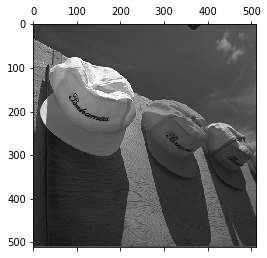

In [2]:
raw_image = open('hat.raw','rb').read()
raw_image = np.frombuffer(raw_image, np.uint8)
img = raw_image[0:512*512]
img = np.reshape(img, (512,512))
plt.matshow(img,cmap='gray')
#plt.show()

In [3]:
top_p = np.array([[1,-255,255,(-255)**2,(-255*255),255**2],
                   [1,-255/2,255/2,(-255/2)**2,(-255*255/4),(255/2)**2],
                   [1,0,0,(0)**2,(0*0),0**2],
                   [1,256,255,(256)**2,(256*255),255**2],
                   [1,256/2,255/2,(256/2)**2,(256*255/4),(255/2)**2],
                   [1,0,255,(0)**2,(0*255),255**2]])
top_x = np.array([-255,-255/2,0,256,256/2,0])
top_y = np.array([255,255/2,0,255,255/2,127])
top_a = np.matmul(np.linalg.inv(top_p),top_x)
top_b = np.matmul(np.linalg.inv(top_p),top_y)
top = np.concatenate((top_a.reshape(1,6),top_b.reshape(1,6)),axis=0)
top_inv = np.linalg.pinv(top)
topx_ = np.concatenate((top_x.reshape(1,6),top_y.reshape(1,6)),axis=0)
topy_=np.matmul(topx_,np.linalg.inv(np.transpose(top_p)))

In [4]:
left_p = np.array([[1,-255,255,(-255)**2,(-255*255),255**2],
                   [1,-255/2,255/2,(-255/2)**2,(-255*255/4),(255/2)**2],
                   [1,0,0,(0)**2,(0*0),0**2],
                   [1,-255,-256,(-255)**2,((-255)*(-256)),(-256)**2],
                   [1,-255/2,-256/2,(-255/2)**2,(255*256/4),(-256/2)**2],
                   [1,-255,0,(-255)**2,(0*255),0**2]])
left_x = np.array([-255,-255/2,0,-255,-255/2,-127])
left_y = np.array([255,255/2,0,-256,-256/2,0])
left_a = np.matmul(np.linalg.inv(left_p),left_x)
left_b = np.matmul(np.linalg.inv(left_p),left_y)
leftx_ = np.concatenate((left_x.reshape(1,6),left_y.reshape(1,6)),axis=0)
lefty_=np.matmul(leftx_,np.linalg.inv(np.transpose(left_p)))


In [5]:
bottom_p = np.array([[1,-255,-256,(-255)**2,((-255)*(-256)),(-256)**2],
                   [1,-255/2,-256/2,(-255/2)**2,((-255)*(-256)/4),(-256/2)**2],
                   [1,0,0,(0)**2,(0*0),0**2],
                   [1,256,-256,(256)**2,((256)*(-256)),(-256)**2],
                   [1,256/2,-256/2,(256/2)**2,((256)*(-256)/4),(-256/2)**2],
                   [1,0,-256,(0)**2,((0)*(-256)),(-256)**2]])
bottom_x = np.array([-255,-255/2,0,256,256/2,0])
bottom_y = np.array([-256,-256/2,0,-256,-256/2,-128])
bottom_a = np.matmul(np.linalg.inv(bottom_p),bottom_x)
bottom_b = np.matmul(np.linalg.inv(bottom_p),bottom_y)
bottomx_ = np.concatenate((bottom_x.reshape(1,6),bottom_y.reshape(1,6)),axis=0)
bottomy_=np.matmul(bottomx_,np.linalg.inv(np.transpose(bottom_p)))


In [6]:
right_p = np.array([[1,256,-256,(256)**2,((256)*(-256)),(-256)**2],
                   [1,256/2,-256/2,(256/2)**2,((256)*(-256)/4),(-256/2)**2],
                   [1,0,0,(0)**2,(0*0),0**2],
                   [1,256,255,(256)**2,((256)*(255)),(255)**2],
                   [1,256/2,255/2,(256/2)**2,((256)*(255)/4),(255/2)**2],
                   [1,256,0,(256)**2,((256)*(-0)),(0)**2]])
right_x = np.array([256,256/2,0,256,256/2,128])
right_y = np.array([-256,-256/2,0,255,255/2,0])
right_a = np.matmul(np.linalg.inv(right_p),right_x)
right_b = np.matmul(np.linalg.inv(right_p),right_y)
rightx_ = np.concatenate((right_x.reshape(1,6),right_y.reshape(1,6)),axis=0)
righty_=np.matmul(rightx_,np.linalg.inv(np.transpose(right_p)))

In [7]:
new_img = np.zeros((512,512),np.uint8)
#top_a=np.array([-65024,0,512,1,0,0])

In [8]:
for i in range(256):
    for j in range(i,512-i):
        x = j-255
        y = 511 - i - 256
        #point = np.array([1,x,y,x**2,x*y,y**2])
        point = np.array([1,x,y,x**2,x*y,y**2]).reshape(6,1)
        new = np.matmul(topy_,point)
        u = new[0][0]
        v=new[1][0]
        #v = np.dot(top_b,point)[1][0]
        p = int(round(u)+255)
        q = int(511-256-round(v))
        if p<0 or q<0 or p>512 or q>512:
            new_img[p][q] = 0
            continue
        
        new_img[q][p] = img[i][j]

In [9]:
for i in range(256):
    for j in range(i,512-i):
        x = i-255
        y = 511 - j - 256
        #point = np.array([1,x,y,x**2,x*y,y**2])
        #u = np.dot(left_a,point)
        #v = np.dot(left_b,point)
        point = np.array([1,x,y,x**2,x*y,y**2]).reshape(6,1)
        new = np.matmul(lefty_,point)
        u = new[0][0]
        v=new[1][0]
        p = int(round(u)+255)
        q = int(511-256-round(v))
        if p<0 or q<0 or p>512 or q>512:
            new_img[q][p] = 0
            continue
        new_img[q][p] = img[j][i]

In [10]:
for i in range(511,255,-1):
    for j in range(511-i,i+1):
        x = j-255
        y = 511 - i - 256
        #point = np.array([1,x,y,x**2,x*y,y**2])
        #u = np.dot(bottom_a,point)
        #v = np.dot(bottom_b,point)
        point = np.array([1,x,y,x**2,x*y,y**2]).reshape(6,1)
        new = np.matmul(bottomy_,point)
        u = new[0][0]
        v=new[1][0]
        p = int(round(u)+255)
        q = int(511-256-round(v))
        if p<0 or q<0 or p>512 or q>512:
            new_img[q][p] = 0
            continue
        new_img[q][p] = img[i][j]

In [11]:
for i in range(511,255,-1):
    for j in range(511-i,i+1):
        x = i-255
        y = 511 - j - 256
        #point = np.array([1,x,y,x**2,x*y,y**2])
        #u = np.dot(right_a,point)
        #v = np.dot(right_b,point)
        point = np.array([1,x,y,x**2,x*y,y**2]).reshape(6,1)
        new = np.matmul(righty_,point)
        u = new[0][0]
        v=new[1][0]
        p = int(round(u)+255)
        q = int(511-256-round(v))
        if p<0 or q<0 or p>512 or q>512:
            new_img[q][p] = 0
            continue
        new_img[q][p] = img[j][i]

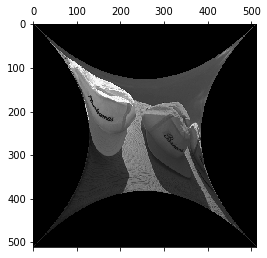

In [12]:
plt.matshow(new_img,cmap='gray')
plt.show()